### ÎëêÍ∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ Ìï©ÏπòÍ≥† Ï≤òÎ¶¨ÌïòÍ∏∞

### Îç∞Ïù¥ÌÑ∞ Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏ 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* ÏΩîÎ°úÎÇò 19(COVID-19) Ïã§ÏãúÍ∞Ñ ÏÉÅÌô©Ìåê
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [2]:
os.listdir(os.getcwd())

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.ipynb',
 '01_dataScraping_corona02.py',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '2021_0911_12',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [3]:
import pandas as pd

# excel Îç∞Ïù¥ÌÑ∞ ÏÖãÎèÑ pd.read_excelÎ°ú Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÏùå.
corona = pd.read_csv("./data/2021-09-20_corona.csv")
vaccine = pd.read_csv("./data/20210920_00_vaccine_bloomberg.csv")
country_code = pd.read_excel("./data/country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((222, 12), (207, 6), (227, 4))

In [4]:
corona.head()

Íµ≠Í∞Ä          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ    ÌôïÏßÑÏûê1Ïùº  \
0   ÎØ∏Íµ≠üá∫üá∏  24327\n-523   1.6   75.8  129632   331002651  42908619  41814.0   
1   Ïù∏ÎèÑüáÆüá≥         8944   1.3   97.7   24277  1380004385  33483170  32085.0   
2  Î∏åÎùºÏßàüáßüá∑         8318   2.8   95.5   99924   212559417  21239783   9458.0   
3   ÏòÅÍµ≠üá¨üáß         1020   1.8   80.5  109444    67886011   7429746  29007.0   
4  Îü¨ÏãúÏïÑüá∑üá∫         2300   2.7   89.3   49986   145934462   7294672  19744.0   

    ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº  
0  691992  430.0  32508846.0  25620.0  
1  445248  349.0  32715105.0  43938.0  
2  590786  239.0  20280294.0      NaN  
3  135203   56.0   5981684.0  22993.0  
4  198996  778.0   6510674.0  11992.0

In [5]:
vaccine.head()

country  Doses_administered  percent_of_people:  1_percent  \
0    Global Total        5.952519e+09              -999.0     -999.0   
1  Mainland China        2.174043e+09                77.6       78.5   
2           India        8.083893e+08                29.6       43.7   
3              EU        5.550877e+08                62.5       66.6   
4            U.S.        3.855860e+08                60.2       63.8   

   2_percent  Daily_rate_of_doses  
0     -999.0           33135900.0  
1       72.3            4494714.0  
2       14.5            9236028.0  
3       62.7            1039973.0  
4       54.6             763444.0

In [6]:
country_code.head()

Íµ≠Î¨∏(ÏΩîÎ°úÎÇòÎ≥¥Îìú) ÏòÅÎ¨∏(Î∏îÎ£∏Î≤ÑÍ∑∏)   ÎÇòÎùº        ÎπÑÍ≥†_Îúª
0        Í∞ÄÎÇò    Ghana  NaN         NaN
1        Í∞ÄÎ¥â    Gabon  NaN         NaN
2      Í∞ÄÏù¥ÏïÑÎÇò   Guyana  NaN         NaN
3       Í∞êÎπÑÏïÑ   Gambia  NaN         NaN
4      Í≥ºÎì§Î£®ÌîÑ      NaN  ÌîÑÎûëÏä§  Guadeloupe

### ÏΩîÎ°úÎÇòÏóê ÎÇòÎùºÎ™ÖÏù¥ ÏûàÏúºÎ©¥ Ìï¥ÎãπÎêòÎäî Ïó¥ÏùÑ Î∂ôÏó¨Îùº

In [7]:
corona['Íµ≠Í∞Ä'].str.extract('([„Ñ±-„Ö£Í∞Ä-Ìû£]+)')

0
0        ÎØ∏Íµ≠
1        Ïù∏ÎèÑ
2       Î∏åÎùºÏßà
3        ÏòÅÍµ≠
4       Îü¨ÏãúÏïÑ
..      ...
217      ÎßàÏÖú
218    Î∞îÎàÑÏïÑÌà¨
219     ÏÇ¨Î™®ÏïÑ
220  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò
221  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ

[222 rows x 1 columns]

In [8]:
corona['hangul_code'] = corona['Íµ≠Í∞Ä'].str.extract('([„Ñ±-„Ö£Í∞Ä-Ìû£]+)', expand=False)
corona.columns

Index(['Íµ≠Í∞Ä', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ',
       'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'hangul_code'],
      dtype='object')

In [9]:
col = ['Íµ≠Í∞Ä', 'hangul_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ',
       'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº']
new_corona = corona[col].copy()
new_corona



Íµ≠Í∞Ä hangul_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò  \
0        ÎØ∏Íµ≠üá∫üá∏          ÎØ∏Íµ≠  24327\n-523   1.6   75.8  129632   331002651   
1        Ïù∏ÎèÑüáÆüá≥          Ïù∏ÎèÑ         8944   1.3   97.7   24277  1380004385   
2       Î∏åÎùºÏßàüáßüá∑         Î∏åÎùºÏßà         8318   2.8   95.5   99924   212559417   
3        ÏòÅÍµ≠üá¨üáß          ÏòÅÍµ≠         1020   1.8   80.5  109444    67886011   
4       Îü¨ÏãúÏïÑüá∑üá∫         Îü¨ÏãúÏïÑ         2300   2.7   89.3   49986   145934462   
..        ...         ...          ...   ...    ...     ...         ...   
217   ÎßàÏÖú Ï†úÎèÑüá≤üá≠          ÎßàÏÖú          NaN     -  100.0      68       59190   
218    Î∞îÎàÑÏïÑÌà¨üáªüá∫        Î∞îÎàÑÏïÑÌà¨          NaN    25   75.0      13      307145   
219     ÏÇ¨Î™®ÏïÑüáºüá∏         ÏÇ¨Î™®ÏïÑ          NaN     -  100.0      15      198414   
220  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇòüá∏üá≠      ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò          NaN     -  100.0     329        6077   
221  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑüá´üá≤      ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ          NaN     -  100.0       9      115023   

       ÌôïÏßÑÏûê_Ìï©Í≥Ñ    ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº  
0    42908619  41814.0  691992  430.0  32508846.0  25620.0  
1    33483170  32085.0  445248  349.0  32715105.0  43938.0  
2    21239783   9458.0  590786  239.0  20280294.0      NaN  
3     7429746  29007.0  135203   56.0   5981684.0  22993.0  
4     7294672  19744.0  198996  778.0   6510674.0  11992.0  
..        ...      ...     ...    ...         ...      ...  
217         4      NaN       0    NaN         4.0      NaN  
218         4      NaN       1    NaN         3.0      NaN  
219         3      NaN       0    NaN         3.0      NaN  
220         2      NaN       0    NaN         2.0      NaN  
221         1      NaN       0    NaN         1.0      NaN  

[222 rows x 13 columns]

### Îëê Îç∞Ïù¥ÌÑ∞ ÏÖã Ïó∞Í≤∞

In [10]:
new_corona.head()

Íµ≠Í∞Ä hangul_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0   ÎØ∏Íµ≠üá∫üá∏          ÎØ∏Íµ≠  24327\n-523   1.6   75.8  129632   331002651  42908619   
1   Ïù∏ÎèÑüáÆüá≥          Ïù∏ÎèÑ         8944   1.3   97.7   24277  1380004385  33483170   
2  Î∏åÎùºÏßàüáßüá∑         Î∏åÎùºÏßà         8318   2.8   95.5   99924   212559417  21239783   
3   ÏòÅÍµ≠üá¨üáß          ÏòÅÍµ≠         1020   1.8   80.5  109444    67886011   7429746   
4  Îü¨ÏãúÏïÑüá∑üá∫         Îü¨ÏãúÏïÑ         2300   2.7   89.3   49986   145934462   7294672   

     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº  
0  41814.0  691992  430.0  32508846.0  25620.0  
1  32085.0  445248  349.0  32715105.0  43938.0  
2   9458.0  590786  239.0  20280294.0      NaN  
3  29007.0  135203   56.0   5981684.0  22993.0  
4  19744.0  198996  778.0   6510674.0  11992.0

In [11]:
country_code.head()

Íµ≠Î¨∏(ÏΩîÎ°úÎÇòÎ≥¥Îìú) ÏòÅÎ¨∏(Î∏îÎ£∏Î≤ÑÍ∑∏)   ÎÇòÎùº        ÎπÑÍ≥†_Îúª
0        Í∞ÄÎÇò    Ghana  NaN         NaN
1        Í∞ÄÎ¥â    Gabon  NaN         NaN
2      Í∞ÄÏù¥ÏïÑÎÇò   Guyana  NaN         NaN
3       Í∞êÎπÑÏïÑ   Gambia  NaN         NaN
4      Í≥ºÎì§Î£®ÌîÑ      NaN  ÌîÑÎûëÏä§  Guadeloupe

In [12]:
country_code.columns = ['han_code', 'eng_code', 'country', 'etc']
country_code.head()

han_code eng_code country         etc
0       Í∞ÄÎÇò    Ghana     NaN         NaN
1       Í∞ÄÎ¥â    Gabon     NaN         NaN
2     Í∞ÄÏù¥ÏïÑÎÇò   Guyana     NaN         NaN
3      Í∞êÎπÑÏïÑ   Gambia     NaN         NaN
4     Í≥ºÎì§Î£®ÌîÑ      NaN     ÌîÑÎûëÏä§  Guadeloupe

In [13]:
df_corona = new_corona.merge(country_code, left_on='hangul_code', 
                             right_on='han_code')
df_corona.head()

Íµ≠Í∞Ä hangul_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0   ÎØ∏Íµ≠üá∫üá∏          ÎØ∏Íµ≠  24327\n-523   1.6   75.8  129632   331002651  42908619   
1   Ïù∏ÎèÑüáÆüá≥          Ïù∏ÎèÑ         8944   1.3   97.7   24277  1380004385  33483170   
2  Î∏åÎùºÏßàüáßüá∑         Î∏åÎùºÏßà         8318   2.8   95.5   99924   212559417  21239783   
3   ÏòÅÍµ≠üá¨üáß          ÏòÅÍµ≠         1020   1.8   80.5  109444    67886011   7429746   
4  Îü¨ÏãúÏïÑüá∑üá∫         Îü¨ÏãúÏïÑ         2300   2.7   89.3   49986   145934462   7294672   

     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº han_code eng_code country  etc  
0  41814.0  691992  430.0  32508846.0  25620.0       ÎØ∏Íµ≠     U.S.     NaN  NaN  
1  32085.0  445248  349.0  32715105.0  43938.0       Ïù∏ÎèÑ    India     NaN  NaN  
2   9458.0  590786  239.0  20280294.0      NaN      Î∏åÎùºÏßà   Brazil     NaN  NaN  
3  29007.0  135203   56.0   5981684.0  22993.0       ÏòÅÍµ≠     U.K.     NaN  NaN  
4  19744.0  198996  778.0   6510674.0  11992.0      Îü¨ÏãúÏïÑ   Russia     NaN  NaN

In [14]:
df_corona.drop(['Íµ≠Í∞Ä', 'han_code', 'country', 'etc'], axis=1, inplace=True)
df_corona.head()

hangul_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0          ÎØ∏Íµ≠  24327\n-523   1.6   75.8  129632   331002651  42908619   
1          Ïù∏ÎèÑ         8944   1.3   97.7   24277  1380004385  33483170   
2         Î∏åÎùºÏßà         8318   2.8   95.5   99924   212559417  21239783   
3          ÏòÅÍµ≠         1020   1.8   80.5  109444    67886011   7429746   
4         Îü¨ÏãúÏïÑ         2300   2.7   89.3   49986   145934462   7294672   

     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº eng_code  
0  41814.0  691992  430.0  32508846.0  25620.0     U.S.  
1  32085.0  445248  349.0  32715105.0  43938.0    India  
2   9458.0  590786  239.0  20280294.0      NaN   Brazil  
3  29007.0  135203   56.0   5981684.0  22993.0     U.K.  
4  19744.0  198996  778.0   6510674.0  11992.0   Russia

In [15]:
vaccine.head()

country  Doses_administered  percent_of_people:  1_percent  \
0    Global Total        5.952519e+09              -999.0     -999.0   
1  Mainland China        2.174043e+09                77.6       78.5   
2           India        8.083893e+08                29.6       43.7   
3              EU        5.550877e+08                62.5       66.6   
4            U.S.        3.855860e+08                60.2       63.8   

   2_percent  Daily_rate_of_doses  
0     -999.0           33135900.0  
1       72.3            4494714.0  
2       14.5            9236028.0  
3       62.7            1039973.0  
4       54.6             763444.0

In [16]:
df_corona_all = df_corona.merge(vaccine, left_on='eng_code', right_on='country')
df_corona_all.head()

hangul_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0          ÎØ∏Íµ≠  24327\n-523   1.6   75.8  129632   331002651  42908619   
1          Ïù∏ÎèÑ         8944   1.3   97.7   24277  1380004385  33483170   
2         Î∏åÎùºÏßà         8318   2.8   95.5   99924   212559417  21239783   
3          ÏòÅÍµ≠         1020   1.8   80.5  109444    67886011   7429746   
4         Îü¨ÏãúÏïÑ         2300   2.7   89.3   49986   145934462   7294672   

     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº eng_code country  \
0  41814.0  691992  430.0  32508846.0  25620.0     U.S.    U.S.   
1  32085.0  445248  349.0  32715105.0  43938.0    India   India   
2   9458.0  590786  239.0  20280294.0      NaN   Brazil  Brazil   
3  29007.0  135203   56.0   5981684.0  22993.0     U.K.    U.K.   
4  19744.0  198996  778.0   6510674.0  11992.0   Russia  Russia   

   Doses_administered  percent_of_people:  1_percent  2_percent  \
0         385586020.0                60.2       63.8       54.6   
1         808389300.0                29.6       43.7       14.5   
2         222322660.0                53.9       69.4       37.8   
3          93002090.0                69.6       72.7       66.5   
4          87810616.0                29.9       31.9       27.6   

   Daily_rate_of_doses  
0             763444.0  
1            9236028.0  
2            1721039.0  
3              83947.0  
4             354749.0

In [17]:
df_corona_all.drop(['country'], axis=1, inplace=True)
df_corona_all

hangul_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0            ÎØ∏Íµ≠  24327\n-523   1.6   75.8  129632   331002651  42908619   
1            Ïù∏ÎèÑ         8944   1.3   97.7   24277  1380004385  33483170   
2           Î∏åÎùºÏßà         8318   2.8   95.5   99924   212559417  21239783   
3            ÏòÅÍµ≠         1020   1.8   80.5  109444    67886011   7429746   
4           Îü¨ÏãúÏïÑ         2300   2.7   89.3   49986   145934462   7294672   
..          ...          ...   ...    ...     ...         ...       ...   
173         ÎßàÏπ¥Ïò§          NaN     -  100.0      97      649335        63   
174        Î™¨Ìä∏ÏÑ∏Îû´          NaN   3.0   90.9    6611        4992        33   
175         ÏÇ¨Î™®ÏïÑ          NaN     -  100.0      15      198414         3   
176      ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò          NaN     -  100.0     329        6077         2   
177      ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ          NaN     -  100.0       9      115023         1   

       ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº    eng_code  \
0    41814.0  691992  430.0  32508846.0  25620.0        U.S.   
1    32085.0  445248  349.0  32715105.0  43938.0       India   
2     9458.0  590786  239.0  20280294.0      NaN      Brazil   
3    29007.0  135203   56.0   5981684.0  22993.0        U.K.   
4    19744.0  198996  778.0   6510674.0  11992.0      Russia   
..       ...     ...    ...         ...      ...         ...   
173      NaN       0    NaN        63.0      NaN       Macau   
174      NaN       1    NaN        30.0      NaN  Montserrat   
175      NaN       0    NaN         3.0      NaN       Samoa   
176      NaN       0    NaN         2.0      NaN  St. Helena   
177      NaN       0    NaN         1.0      NaN  Micronesia   

     Doses_administered  percent_of_people:  1_percent  2_percent  \
0           385586020.0                60.2       63.8       54.6   
1           808389300.0                29.6       43.7       14.5   
2           222322660.0                53.9       69.4       37.8   
3            93002090.0                69.6       72.7       66.5   
4            87810616.0                29.9       31.9       27.6   
..                  ...                 ...        ...        ...   
173            633071.0                46.5       49.8       43.6   
174              2840.0                28.4       29.3       27.5   
175            142566.0                35.5       48.3       22.7   
176              7892.0                65.8       72.7       58.9   
177             69970.0                33.6       40.8     -999.0   

     Daily_rate_of_doses  
0               763444.0  
1              9236028.0  
2              1721039.0  
3                83947.0  
4               354749.0  
..                   ...  
173               2787.0  
174               -999.0  
175                658.0  
176                  8.0  
177                242.0  

[178 rows x 18 columns]

In [18]:
df_corona_all.columns

Index(['hangul_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº',
       'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'eng_code', 'Doses_administered',
       'percent_of_people:', '1_percent', '2_percent', 'Daily_rate_of_doses'],
      dtype='object')

In [19]:
sel = ['hangul_code', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº',
       'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Doses_administered',
       'percent_of_people:', '1_percent', '2_percent',  'Daily_rate_of_doses' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n

hangul_code    eng_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò  \
0            ÎØ∏Íµ≠        U.S.  24327\n-523   1.6   75.8  129632   331002651   
1            Ïù∏ÎèÑ       India         8944   1.3   97.7   24277  1380004385   
2           Î∏åÎùºÏßà      Brazil         8318   2.8   95.5   99924   212559417   
3            ÏòÅÍµ≠        U.K.         1020   1.8   80.5  109444    67886011   
4           Îü¨ÏãúÏïÑ      Russia         2300   2.7   89.3   49986   145934462   
..          ...         ...          ...   ...    ...     ...         ...   
173         ÎßàÏπ¥Ïò§       Macau          NaN     -  100.0      97      649335   
174        Î™¨Ìä∏ÏÑ∏Îû´  Montserrat          NaN   3.0   90.9    6611        4992   
175         ÏÇ¨Î™®ÏïÑ       Samoa          NaN     -  100.0      15      198414   
176      ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena          NaN     -  100.0     329        6077   
177      ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia          NaN     -  100.0       9      115023   

       ÌôïÏßÑÏûê_Ìï©Í≥Ñ    ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº  \
0    42908619  41814.0  691992  430.0  32508846.0  25620.0   
1    33483170  32085.0  445248  349.0  32715105.0  43938.0   
2    21239783   9458.0  590786  239.0  20280294.0      NaN   
3     7429746  29007.0  135203   56.0   5981684.0  22993.0   
4     7294672  19744.0  198996  778.0   6510674.0  11992.0   
..        ...      ...     ...    ...         ...      ...   
173        63      NaN       0    NaN        63.0      NaN   
174        33      NaN       1    NaN        30.0      NaN   
175         3      NaN       0    NaN         3.0      NaN   
176         2      NaN       0    NaN         2.0      NaN   
177         1      NaN       0    NaN         1.0      NaN   

     Doses_administered  percent_of_people:  1_percent  2_percent  \
0           385586020.0                60.2       63.8       54.6   
1           808389300.0                29.6       43.7       14.5   
2           222322660.0                53.9       69.4       37.8   
3            93002090.0                69.6       72.7       66.5   
4            87810616.0                29.9       31.9       27.6   
..                  ...                 ...        ...        ...   
173            633071.0                46.5       49.8       43.6   
174              2840.0                28.4       29.3       27.5   
175            142566.0                35.5       48.3       22.7   
176              7892.0                65.8       72.7       58.9   
177             69970.0                33.6       40.8     -999.0   

     Daily_rate_of_doses  
0               763444.0  
1              9236028.0  
2              1721039.0  
3                83947.0  
4               354749.0  
..                   ...  
173               2787.0  
174               -999.0  
175                658.0  
176                  8.0  
177                242.0  

[178 rows x 18 columns]

In [20]:
df_corona_all_n.columns

Index(['hangul_code', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò',
       'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº',
       'Doses_administered', 'percent_of_people:', '1_percent', '2_percent',
       'Daily_rate_of_doses'],
      dtype='object')

In [21]:
df_corona_all_n.columns = ['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº','Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö',
       'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)']
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò  \
0        ÎØ∏Íµ≠        U.S.  24327\n-523   1.6   75.8  129632   331002651   
1        Ïù∏ÎèÑ       India         8944   1.3   97.7   24277  1380004385   
2       Î∏åÎùºÏßà      Brazil         8318   2.8   95.5   99924   212559417   
3        ÏòÅÍµ≠        U.K.         1020   1.8   80.5  109444    67886011   
4       Îü¨ÏãúÏïÑ      Russia         2300   2.7   89.3   49986   145934462   
..      ...         ...          ...   ...    ...     ...         ...   
173     ÎßàÏπ¥Ïò§       Macau          NaN     -  100.0      97      649335   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat          NaN   3.0   90.9    6611        4992   
175     ÏÇ¨Î™®ÏïÑ       Samoa          NaN     -  100.0      15      198414   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena          NaN     -  100.0     329        6077   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia          NaN     -  100.0       9      115023   

       ÌôïÏßÑÏûê_Ìï©Í≥Ñ    ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº         Î∞±Ïã†Ï†ëÏ¢Ö  \
0    42908619  41814.0  691992  430.0  32508846.0  25620.0  385586020.0   
1    33483170  32085.0  445248  349.0  32715105.0  43938.0  808389300.0   
2    21239783   9458.0  590786  239.0  20280294.0      NaN  222322660.0   
3     7429746  29007.0  135203   56.0   5981684.0  22993.0   93002090.0   
4     7294672  19744.0  198996  778.0   6510674.0  11992.0   87810616.0   
..        ...      ...     ...    ...         ...      ...          ...   
173        63      NaN       0    NaN        63.0      NaN     633071.0   
174        33      NaN       1    NaN        30.0      NaN       2840.0   
175         3      NaN       0    NaN         3.0      NaN     142566.0   
176         2      NaN       0    NaN         2.0      NaN       7892.0   
177         1      NaN       0    NaN         1.0      NaN      69970.0   

     Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0       60.2  63.8   54.6   763444.0  
1       29.6  43.7   14.5  9236028.0  
2       53.9  69.4   37.8  1721039.0  
3       69.6  72.7   66.5    83947.0  
4       29.9  31.9   27.6   354749.0  
..       ...   ...    ...        ...  
173     46.5  49.8   43.6     2787.0  
174     28.4  29.3   27.5     -999.0  
175     35.5  48.3   22.7      658.0  
176     65.8  72.7   58.9        8.0  
177     33.6  40.8 -999.0      242.0  

[178 rows x 18 columns]

In [22]:
df_corona_all_n.sort_values(['Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)'], ascending=False)

Íµ≠Í∞ÄÎ™Ö      eng_code  ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†       Ïù∏Íµ¨Ïàò  ÌôïÏßÑÏûê_Ìï©Í≥Ñ  ÌôïÏßÑÏûê1Ïùº  \
160     ÏßÄÎ∏åÎ°§ÌÑ∞     Gibraltar    2   1.8   96.9  162625     33691    5479    2.0   
109      Î™∞ÎîîÎ∏å      Maldives   23   0.3   97.7  154615    540544   83576   82.0   
42   ÏïÑÎûçÏóêÎØ∏Î†àÏù¥Ìä∏           UAE  NaN   0.3   98.9   74113   9890402  733003  313.0   
171     Í∑∏Î¶∞ÎûÄÎìú     Greenland    2     -   78.0    8173     56770     464    NaN   
64      Ïö∞Î£®Í≥ºÏù¥       Uruguay   11   1.6   98.0  111588   3473730  387627   72.0   
..       ...           ...  ...   ...    ...     ...       ...     ...    ...   
153       ÏòàÎ©ò         Yemen   23  18.9   62.0     292  29825964    8718   51.0   
144   Î∂ÄÎ•¥ÌÇ§ÎÇòÌååÏÜå  Burkina Faso  NaN   1.2   97.6     672  20903273   14041    NaN   
149      ÎÇ®ÏàòÎã®   South Sudan  NaN   1.0   94.8    1055  11193725   11814    9.0   
163       Ï∞®Îìú          Chad  NaN   3.5   96.2     306  16425864    5029    3.0   
116  ÏΩ©Í≥†ÎØºÏ£ºÍ≥µÌôîÍµ≠      DR Congo  NaN   1.9   54.7     630  89561403   56387    NaN   

     ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº      ÏôÑÏπòÌï©Í≥Ñ   ÏôÑÏπò1Ïùº        Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)   1Ï∞®Ï†ëÏ¢Ö    2Ï∞®Ï†ëÏ¢Ö  \
160     97    NaN    5309.0    6.0     79269.0    116.6  117.2  116.00   
109    229    NaN   81671.0  127.0    720666.0     96.9  105.0   88.70   
42    2077    2.0  724855.0  409.0  19445872.0     90.5   84.5   74.50   
171      0    NaN     362.0    NaN    102357.0     89.8  124.5   62.90   
64    6048    NaN  379986.0  103.0   6017599.0     85.5   77.2   72.70   
..     ...    ...       ...    ...         ...      ...    ...     ...   
153   1649    6.0    5401.0   24.0    322934.0      0.5    1.0    0.05   
144    172    NaN   13697.0    NaN    166160.0      0.4    0.8    0.50   
149    121    NaN   11195.0    NaN     67109.0      0.3    0.4    0.10   
163    174    NaN    4837.0    NaN    104707.0      0.3    0.5    0.10   
116   1068    NaN   30858.0    NaN    120062.0      0.1    0.1    0.05   

     Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
160      44.0  
109    3817.0  
42    71904.0  
171     300.0  
64    14148.0  
..        ...  
153     244.0  
144    4780.0  
149    1035.0  
163    2880.0  
116    1274.0  

[178 rows x 18 columns]

In [23]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Íµ≠Í∞ÄÎ™Ö       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   ÏúÑÏ§ëÏ¶ù       131 non-null    object 
 3   ÏπòÎ™Ö(%)     178 non-null    object 
 4   ÏôÑÏπò(%)     175 non-null    float64
 5   Î∞úÏÉùÎ•†       178 non-null    object 
 6   Ïù∏Íµ¨Ïàò       178 non-null    object 
 7   ÌôïÏßÑÏûê_Ìï©Í≥Ñ    178 non-null    int64  
 8   ÌôïÏßÑÏûê1Ïùº     130 non-null    float64
 9   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ     178 non-null    int64  
 10  ÏÇ¨ÎßùÏûê1Ïùº     104 non-null    float64
 11  ÏôÑÏπòÌï©Í≥Ñ      175 non-null    float64
 12  ÏôÑÏπò1Ïùº      115 non-null    float64
 13  Î∞±Ïã†Ï†ëÏ¢Ö      178 non-null    float64
 14  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)   178 non-null    float64
 15  1Ï∞®Ï†ëÏ¢Ö      178 non-null    float64
 16  2Ï∞®Ï†ëÏ¢Ö      178 non-null    float64
 17  Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  178 non-null   

In [24]:
df_corona_all_n['Î∞úÏÉùÎ•†'] = df_corona_all_n['Î∞úÏÉùÎ•†'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Íµ≠Í∞ÄÎ™Ö       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   ÏúÑÏ§ëÏ¶ù       131 non-null    object 
 3   ÏπòÎ™Ö(%)     178 non-null    object 
 4   ÏôÑÏπò(%)     175 non-null    float64
 5   Î∞úÏÉùÎ•†       178 non-null    int32  
 6   Ïù∏Íµ¨Ïàò       178 non-null    object 
 7   ÌôïÏßÑÏûê_Ìï©Í≥Ñ    178 non-null    int64  
 8   ÌôïÏßÑÏûê1Ïùº     130 non-null    float64
 9   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ     178 non-null    int64  
 10  ÏÇ¨ÎßùÏûê1Ïùº     104 non-null    float64
 11  ÏôÑÏπòÌï©Í≥Ñ      175 non-null    float64
 12  ÏôÑÏπò1Ïùº      115 non-null    float64
 13  Î∞±Ïã†Ï†ëÏ¢Ö      178 non-null    float64
 14  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)   178 non-null    float64
 15  1Ï∞®Ï†ëÏ¢Ö      178 non-null    float64
 16  2Ï∞®Ï†ëÏ¢Ö      178 non-null    float64
 17  Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  178 non-null   

In [25]:
df_corona_all_n['Î∞úÏÉùÎ•†_ÏàúÏúÑ'] = df_corona_all_n['Î∞úÏÉùÎ•†'].rank(ascending=False) # ascending=False : ÎÇ¥Î¶ºÏ∞®Ïàú
df_corona_all_n['Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ'] = df_corona_all_n['Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)'].rank(ascending=False) # ascending=False : ÎÇ¥Î¶ºÏ∞®Ïàú
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò  \
0        ÎØ∏Íµ≠        U.S.  24327\n-523   1.6   75.8  129632   331002651   
1        Ïù∏ÎèÑ       India         8944   1.3   97.7   24277  1380004385   
2       Î∏åÎùºÏßà      Brazil         8318   2.8   95.5   99924   212559417   
3        ÏòÅÍµ≠        U.K.         1020   1.8   80.5  109444    67886011   
4       Îü¨ÏãúÏïÑ      Russia         2300   2.7   89.3   49986   145934462   
..      ...         ...          ...   ...    ...     ...         ...   
173     ÎßàÏπ¥Ïò§       Macau          NaN     -  100.0      97      649335   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat          NaN   3.0   90.9    6611        4992   
175     ÏÇ¨Î™®ÏïÑ       Samoa          NaN     -  100.0      15      198414   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena          NaN     -  100.0     329        6077   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia          NaN     -  100.0       9      115023   

       ÌôïÏßÑÏûê_Ìï©Í≥Ñ    ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº         Î∞±Ïã†Ï†ëÏ¢Ö  \
0    42908619  41814.0  691992  430.0  32508846.0  25620.0  385586020.0   
1    33483170  32085.0  445248  349.0  32715105.0  43938.0  808389300.0   
2    21239783   9458.0  590786  239.0  20280294.0      NaN  222322660.0   
3     7429746  29007.0  135203   56.0   5981684.0  22993.0   93002090.0   
4     7294672  19744.0  198996  778.0   6510674.0  11992.0   87810616.0   
..        ...      ...     ...    ...         ...      ...          ...   
173        63      NaN       0    NaN        63.0      NaN     633071.0   
174        33      NaN       1    NaN        30.0      NaN       2840.0   
175         3      NaN       0    NaN         3.0      NaN     142566.0   
176         2      NaN       0    NaN         2.0      NaN       7892.0   
177         1      NaN       0    NaN         1.0      NaN      69970.0   

     Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  
0       60.2  63.8   54.6   763444.0    13.0    46.0  
1       29.6  43.7   14.5  9236028.0   101.0    99.0  
2       53.9  69.4   37.8  1721039.0    27.0    62.0  
3       69.6  72.7   66.5    83947.0    21.0    25.0  
4       29.9  31.9   27.6   354749.0    77.0    97.0  
..       ...   ...    ...        ...     ...     ...  
173     46.5  49.8   43.6     2787.0   175.0    71.0  
174     28.4  29.3   27.5     -999.0   127.0   100.5  
175     35.5  48.3   22.7      658.0   177.0    83.0  
176     65.8  72.7   58.9        8.0   171.0    33.0  
177     33.6  40.8 -999.0      242.0   178.0    89.0  

[178 rows x 20 columns]

In [26]:
df_corona_all_n.sort_values(['Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ'], ascending=True)

Íµ≠Í∞ÄÎ™Ö      eng_code  ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†       Ïù∏Íµ¨Ïàò  ÌôïÏßÑÏûê_Ìï©Í≥Ñ  ÌôïÏßÑÏûê1Ïùº  \
160     ÏßÄÎ∏åÎ°§ÌÑ∞     Gibraltar    2   1.8   96.9  162625     33691    5479    2.0   
109      Î™∞ÎîîÎ∏å      Maldives   23   0.3   97.7  154615    540544   83576   82.0   
42   ÏïÑÎûçÏóêÎØ∏Î†àÏù¥Ìä∏           UAE  NaN   0.3   98.9   74113   9890402  733003  313.0   
171     Í∑∏Î¶∞ÎûÄÎìú     Greenland    2     -   78.0    8173     56770     464    NaN   
64      Ïö∞Î£®Í≥ºÏù¥       Uruguay   11   1.6   98.0  111588   3473730  387627   72.0   
..       ...           ...  ...   ...    ...     ...       ...     ...    ...   
120   ÎßàÎã§Í∞ÄÏä§Ïπ¥Î•¥    Madagascar    3   2.2   96.3    1549  27691018   42898    NaN   
144   Î∂ÄÎ•¥ÌÇ§ÎÇòÌååÏÜå  Burkina Faso  NaN   1.2   97.6     672  20903273   14041    NaN   
163       Ï∞®Îìú          Chad  NaN   3.5   96.2     306  16425864    5029    3.0   
149      ÎÇ®ÏàòÎã®   South Sudan  NaN   1.0   94.8    1055  11193725   11814    9.0   
116  ÏΩ©Í≥†ÎØºÏ£ºÍ≥µÌôîÍµ≠      DR Congo  NaN   1.9   54.7     630  89561403   56387    NaN   

     ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº      ÏôÑÏπòÌï©Í≥Ñ   ÏôÑÏπò1Ïùº        Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)   1Ï∞®Ï†ëÏ¢Ö    2Ï∞®Ï†ëÏ¢Ö  \
160     97    NaN    5309.0    6.0     79269.0    116.6  117.2  116.00   
109    229    NaN   81671.0  127.0    720666.0     96.9  105.0   88.70   
42    2077    2.0  724855.0  409.0  19445872.0     90.5   84.5   74.50   
171      0    NaN     362.0    NaN    102357.0     89.8  124.5   62.90   
64    6048    NaN  379986.0  103.0   6017599.0     85.5   77.2   72.70   
..     ...    ...       ...    ...         ...      ...    ...     ...   
120    958    NaN   41322.0    NaN    283091.0      0.5    0.8    0.30   
144    172    NaN   13697.0    NaN    166160.0      0.4    0.8    0.50   
163    174    NaN    4837.0    NaN    104707.0      0.3    0.5    0.10   
149    121    NaN   11195.0    NaN     67109.0      0.3    0.4    0.10   
116   1068    NaN   30858.0    NaN    120062.0      0.1    0.1    0.05   

     Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  
160      44.0     4.0     1.0  
109    3817.0     8.0     2.0  
42    71904.0    52.0     3.0  
171     300.0   122.0     4.0  
64    14148.0    20.0     5.0  
..        ...     ...     ...  
120    1230.0   159.0   173.5  
144    4780.0   169.0   175.0  
163    2880.0   172.0   176.5  
149    1035.0   162.0   176.5  
116    1274.0   170.0   178.0  

[178 rows x 20 columns]

In [27]:
df_corona_all_n.columns

Index(['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', '1Ï∞®Ï†ëÏ¢Ö',
       '2Ï∞®Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ'],
      dtype='object')

In [28]:
sel = [ 'Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'Î∞±Ïã†Ï†ëÏ¢Ö', 
       'Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 
       'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 
       'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n



Íµ≠Í∞ÄÎ™Ö    eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  \
0        ÎØ∏Íµ≠        U.S.  129632   331002651  385586020.0     60.2    13.0   
1        Ïù∏ÎèÑ       India   24277  1380004385  808389300.0     29.6   101.0   
2       Î∏åÎùºÏßà      Brazil   99924   212559417  222322660.0     53.9    27.0   
3        ÏòÅÍµ≠        U.K.  109444    67886011   93002090.0     69.6    21.0   
4       Îü¨ÏãúÏïÑ      Russia   49986   145934462   87810616.0     29.9    77.0   
..      ...         ...     ...         ...          ...      ...     ...   
173     ÎßàÏπ¥Ïò§       Macau      97      649335     633071.0     46.5   175.0   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat    6611        4992       2840.0     28.4   127.0   
175     ÏÇ¨Î™®ÏïÑ       Samoa      15      198414     142566.0     35.5   177.0   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena     329        6077       7892.0     65.8   171.0   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia       9      115023      69970.0     33.6   178.0   

     Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)    ÌôïÏßÑÏûê_Ìï©Í≥Ñ    ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  \
0      46.0  63.8   54.6  24327\n-523   1.6   75.8  42908619  41814.0  691992   
1      99.0  43.7   14.5         8944   1.3   97.7  33483170  32085.0  445248   
2      62.0  69.4   37.8         8318   2.8   95.5  21239783   9458.0  590786   
3      25.0  72.7   66.5         1020   1.8   80.5   7429746  29007.0  135203   
4      97.0  31.9   27.6         2300   2.7   89.3   7294672  19744.0  198996   
..      ...   ...    ...          ...   ...    ...       ...      ...     ...   
173    71.0  49.8   43.6          NaN     -  100.0        63      NaN       0   
174   100.5  29.3   27.5          NaN   3.0   90.9        33      NaN       1   
175    83.0  48.3   22.7          NaN     -  100.0         3      NaN       0   
176    33.0  72.7   58.9          NaN     -  100.0         2      NaN       0   
177    89.0  40.8 -999.0          NaN     -  100.0         1      NaN       0   

     ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0    430.0  32508846.0  25620.0   763444.0  
1    349.0  32715105.0  43938.0  9236028.0  
2    239.0  20280294.0      NaN  1721039.0  
3     56.0   5981684.0  22993.0    83947.0  
4    778.0   6510674.0  11992.0   354749.0  
..     ...         ...      ...        ...  
173    NaN        63.0      NaN     2787.0  
174    NaN        30.0      NaN     -999.0  
175    NaN         3.0      NaN      658.0  
176    NaN         2.0      NaN        8.0  
177    NaN         1.0      NaN      242.0  

[178 rows x 20 columns]

In [29]:
df_corona_all_n.sort_values(['Î∞úÏÉùÎ•†_ÏàúÏúÑ'])

Íµ≠Í∞ÄÎ™Ö        eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò          Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)  \
130     ÏÑ∏Ïù¥ÏÖ∏      Seychelles  212950       98347  1.434900e+05     74.7   
98    Î™¨ÌÖåÎÑ§Í∑∏Î°ú      Montenegro  201705      628066  4.338670e+05     34.8   
140     ÏïàÎèÑÎùº         Andorra  195742       77265  9.343000e+04     60.7   
160    ÏßÄÎ∏åÎ°§ÌÑ∞       Gibraltar  162625       33691  7.926900e+04    116.6   
78      Î∞îÎ†àÏù∏         Bahrain  161182     1701575  2.535900e+06     85.4   
..      ...             ...     ...         ...           ...      ...   
158     ÎãàÏ†úÎ•¥           Niger     246    24206644  6.218530e+05      1.3   
173     ÎßàÏπ¥Ïò§           Macau      97      649335  6.330710e+05     46.5   
105      Ï§ëÍµ≠  Mainland China      67  1439323776  2.174043e+09     77.6   
175     ÏÇ¨Î™®ÏïÑ           Samoa      15      198414  1.425660e+05     35.5   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ      Micronesia       9      115023  6.997000e+04     33.6   

     Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ   1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö  ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)  ÌôïÏßÑÏûê_Ìï©Í≥Ñ  ÌôïÏßÑÏûê1Ïùº  ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  \
130     1.0    17.0   77.4   72.6  NaN   0.5   96.7   20943    NaN    114   
98      2.0    85.0   36.9   32.6   11   1.5   92.1  126684  425.0   1859   
140     3.0    44.0   67.0   54.3    4   0.9   98.8   15124    NaN    130   
160     4.0     1.0  117.2  116.0    2   1.8   96.9    5479    2.0     97   
78      5.0     6.0   78.2   74.4    2   0.5   99.2  274264   85.0   1388   
..      ...     ...    ...    ...  ...   ...    ...     ...    ...    ...   
158   174.0   165.0    1.7    0.4  NaN   3.4   95.5    5957    NaN    201   
173   175.0    71.0   49.8   43.6  NaN     -  100.0      63    NaN      0   
105   176.0    12.0   78.5   72.3  NaN   4.8   94.2   95738   49.0   4636   
175   177.0    83.0   48.3   22.7  NaN     -  100.0       3    NaN      0   
177   178.0    89.0   40.8 -999.0  NaN     -  100.0       1    NaN      0   

     ÏÇ¨ÎßùÏûê1Ïùº      ÏôÑÏπòÌï©Í≥Ñ   ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
130    NaN   20245.0    NaN      158.0  
98    10.0  116709.0  350.0     2245.0  
140    NaN   14941.0    NaN       98.0  
160    NaN    5309.0    6.0       44.0  
78     NaN  272108.0   96.0     2395.0  
..     ...       ...    ...        ...  
158    NaN    5689.0    NaN     9294.0  
173    NaN      63.0    NaN     2787.0  
105    NaN   90160.0   34.0  4494714.0  
175    NaN       3.0    NaN      658.0  
177    NaN       1.0    NaN      242.0  

[178 rows x 20 columns]

### Ïù∏Íµ¨Îãπ ÌôïÏßÑÏûê ÎπÑÏú®

In [30]:
df_corona_all_n['ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨'] = df_corona_all_n['ÌôïÏßÑÏûê_Ìï©Í≥Ñ'].astype(int)/df_corona_all_n['Ïù∏Íµ¨Ïàò'].astype(int)
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  \
0        ÎØ∏Íµ≠        U.S.  129632   331002651  385586020.0     60.2    13.0   
1        Ïù∏ÎèÑ       India   24277  1380004385  808389300.0     29.6   101.0   
2       Î∏åÎùºÏßà      Brazil   99924   212559417  222322660.0     53.9    27.0   
3        ÏòÅÍµ≠        U.K.  109444    67886011   93002090.0     69.6    21.0   
4       Îü¨ÏãúÏïÑ      Russia   49986   145934462   87810616.0     29.9    77.0   
..      ...         ...     ...         ...          ...      ...     ...   
173     ÎßàÏπ¥Ïò§       Macau      97      649335     633071.0     46.5   175.0   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat    6611        4992       2840.0     28.4   127.0   
175     ÏÇ¨Î™®ÏïÑ       Samoa      15      198414     142566.0     35.5   177.0   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena     329        6077       7892.0     65.8   171.0   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia       9      115023      69970.0     33.6   178.0   

     Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö  ... ÏπòÎ™Ö(%)  ÏôÑÏπò(%)    ÌôïÏßÑÏûê_Ìï©Í≥Ñ    ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº  \
0      46.0  63.8   54.6  ...   1.6   75.8  42908619  41814.0  691992  430.0   
1      99.0  43.7   14.5  ...   1.3   97.7  33483170  32085.0  445248  349.0   
2      62.0  69.4   37.8  ...   2.8   95.5  21239783   9458.0  590786  239.0   
3      25.0  72.7   66.5  ...   1.8   80.5   7429746  29007.0  135203   56.0   
4      97.0  31.9   27.6  ...   2.7   89.3   7294672  19744.0  198996  778.0   
..      ...   ...    ...  ...   ...    ...       ...      ...     ...    ...   
173    71.0  49.8   43.6  ...     -  100.0        63      NaN       0    NaN   
174   100.5  29.3   27.5  ...   3.0   90.9        33      NaN       1    NaN   
175    83.0  48.3   22.7  ...     -  100.0         3      NaN       0    NaN   
176    33.0  72.7   58.9  ...     -  100.0         2      NaN       0    NaN   
177    89.0  40.8 -999.0  ...     -  100.0         1      NaN       0    NaN   

           ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨  
0    32508846.0  25620.0   763444.0    0.129632  
1    32715105.0  43938.0  9236028.0    0.024263  
2    20280294.0      NaN  1721039.0    0.099924  
3     5981684.0  22993.0    83947.0    0.109444  
4     6510674.0  11992.0   354749.0    0.049986  
..          ...      ...        ...         ...  
173        63.0      NaN     2787.0    0.000097  
174        30.0      NaN     -999.0    0.006611  
175         3.0      NaN      658.0    0.000015  
176         2.0      NaN        8.0    0.000329  
177         1.0      NaN      242.0    0.000009  

[178 rows x 21 columns]

In [31]:
df_corona_all_n.columns

Index(['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ',
       '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ',
       'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)', 'ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨'],
      dtype='object')

In [32]:
sel = ['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ',
       'ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)',  'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ',
       'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)  \
0        ÎØ∏Íµ≠        U.S.  129632   331002651  42908619  385586020.0     60.2   
1        Ïù∏ÎèÑ       India   24277  1380004385  33483170  808389300.0     29.6   
2       Î∏åÎùºÏßà      Brazil   99924   212559417  21239783  222322660.0     53.9   
3        ÏòÅÍµ≠        U.K.  109444    67886011   7429746   93002090.0     69.6   
4       Îü¨ÏãúÏïÑ      Russia   49986   145934462   7294672   87810616.0     29.9   
..      ...         ...     ...         ...       ...          ...      ...   
173     ÎßàÏπ¥Ïò§       Macau      97      649335        63     633071.0     46.5   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat    6611        4992        33       2840.0     28.4   
175     ÏÇ¨Î™®ÏïÑ       Samoa      15      198414         3     142566.0     35.5   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena     329        6077         2       7892.0     65.8   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia       9      115023         1      69970.0     33.6   

     Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨  ...   2Ï∞®Ï†ëÏ¢Ö          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)  \
0      13.0    46.0    0.129632  ...   54.6  24327\n-523   1.6   75.8   
1     101.0    99.0    0.024263  ...   14.5         8944   1.3   97.7   
2      27.0    62.0    0.099924  ...   37.8         8318   2.8   95.5   
3      21.0    25.0    0.109444  ...   66.5         1020   1.8   80.5   
4      77.0    97.0    0.049986  ...   27.6         2300   2.7   89.3   
..      ...     ...         ...  ...    ...          ...   ...    ...   
173   175.0    71.0    0.000097  ...   43.6          NaN     -  100.0   
174   127.0   100.5    0.006611  ...   27.5          NaN   3.0   90.9   
175   177.0    83.0    0.000015  ...   22.7          NaN     -  100.0   
176   171.0    33.0    0.000329  ...   58.9          NaN     -  100.0   
177   178.0    89.0    0.000009  ... -999.0          NaN     -  100.0   

       ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0    41814.0  691992  430.0  32508846.0  25620.0   763444.0  
1    32085.0  445248  349.0  32715105.0  43938.0  9236028.0  
2     9458.0  590786  239.0  20280294.0      NaN  1721039.0  
3    29007.0  135203   56.0   5981684.0  22993.0    83947.0  
4    19744.0  198996  778.0   6510674.0  11992.0   354749.0  
..       ...     ...    ...         ...      ...        ...  
173      NaN       0    NaN        63.0      NaN     2787.0  
174      NaN       1    NaN        30.0      NaN     -999.0  
175      NaN       0    NaN         3.0      NaN      658.0  
176      NaN       0    NaN         2.0      NaN        8.0  
177      NaN       0    NaN         1.0      NaN      242.0  

[178 rows x 21 columns]

In [33]:
from datetime import datetime
import os

now = datetime.now()
file_make_time = "%04d%02d%02d_%02d" % (now.year, now.month, now.day, now.hour)
print( file_make_time )

path_dir = os.getcwd() + "\\data\\"
path_file = path_dir + file_make_time
print( path_dir,  path_file, sep="\n" )

20210921_00
C:\Users\toto\Documents\Github\corona_analysis\data\
C:\Users\toto\Documents\Github\corona_analysis\data\20210921_00


In [34]:
df_corona_all_n.to_csv(path_file + "_datamerge.csv", index=False)
df_corona_all_n.to_excel(path_file + "_datamerge.xlsx", index=False)

In [35]:
import seaborn as sns

### Î∞±Ïã† Ï†ëÏ¢ÖÎ•†Í≥º Ïù∏Íµ¨Îãπ ÌôïÏßÑÏûê ÎπÑÏú®Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

In [36]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [37]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [38]:
df_corona_all_n.columns

Index(['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ',
       'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ', 'ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)'],
      dtype='object')

In [39]:
df_corona_all_n.head()

Íµ≠Í∞ÄÎ™Ö eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  \
0   ÎØ∏Íµ≠     U.S.  129632   331002651  42908619  385586020.0     60.2    13.0   
1   Ïù∏ÎèÑ    India   24277  1380004385  33483170  808389300.0     29.6   101.0   
2  Î∏åÎùºÏßà   Brazil   99924   212559417  21239783  222322660.0     53.9    27.0   
3   ÏòÅÍµ≠     U.K.  109444    67886011   7429746   93002090.0     69.6    21.0   
4  Îü¨ÏãúÏïÑ   Russia   49986   145934462   7294672   87810616.0     29.9    77.0   

   Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨  ...  2Ï∞®Ï†ëÏ¢Ö          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%) ÏôÑÏπò(%)    ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  \
0    46.0    0.129632  ...  54.6  24327\n-523   1.6  75.8  41814.0  691992   
1    99.0    0.024263  ...  14.5         8944   1.3  97.7  32085.0  445248   
2    62.0    0.099924  ...  37.8         8318   2.8  95.5   9458.0  590786   
3    25.0    0.109444  ...  66.5         1020   1.8  80.5  29007.0  135203   
4    97.0    0.049986  ...  27.6         2300   2.7  89.3  19744.0  198996   

   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ     ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0  430.0  32508846.0  25620.0   763444.0  
1  349.0  32715105.0  43938.0  9236028.0  
2  239.0  20280294.0      NaN  1721039.0  
3   56.0   5981684.0  22993.0    83947.0  
4  778.0   6510674.0  11992.0   354749.0  

[5 rows x 21 columns]

### ÌôïÏßÑÏûê ÎπÑÏú®Í≥º Î∞±Ïã† Ï†ëÏ¢ÖÎ•† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏Ìï¥ Î≥¥Í∏∞

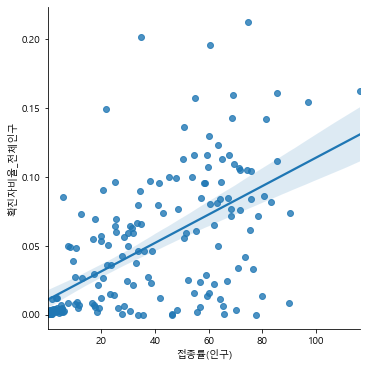

In [40]:
sns.lmplot(x='Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', y='ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨', data=df_corona_all_n)
plt.show()

### Ïù∏Íµ¨Îãπ ÌôïÏßÑÏûê Î∞úÏÉù ÎπÑÏú®Í≥º Î∞±Ïã† Ï†ëÏ¢ÖÎ•† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∑∏ÎûòÌîÑ Í∑∏Î†§Î≥¥Í∏∞

In [41]:
sns.lmplot(x='Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)', y='Î∞úÏÉùÎ•†', data=df_corona_all_n)
plt.show()

In [42]:
df_corona_all_n.corr()['Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)']['Î∞úÏÉùÎ•†']

0.5828778659099443

In [43]:
df_corona_all_n.corr()['Ï†ëÏ¢ÖÎ•†(Ïù∏Íµ¨)']['ÌôïÏßÑÏûêÎπÑÏú®_Ï†ÑÏ≤¥Ïù∏Íµ¨']

0.5828779400729657

### 01 ÌòÑÏû¨ÍπåÏßÄÏùò ÎàÑÏ†ÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ Í≤∞Í≥º Î∞±Ïã† Ï†ëÏ¢ÖÎ•†Í≥º Ïù∏Íµ¨Îãπ ÌôïÏßÑÏßÄ ÎπÑÏú®ÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäîÎã§.
### 02 ÌòÑÏû¨ÍπåÏßÄÏùò ÎàÑÏ†ÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ Í≤∞Í≥º Î∞±Ïã† Ï†ëÏ¢ÖÎ•†Í≥º ÌôïÏßÑÏûê Î∞úÏÉù ÎπÑÏú®ÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäîÎã§.